In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [12]:
#Load Files & Merge
mouse_drug_data = pd.read_csv("mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("clinicaltrial_data.csv")
data = pd.merge(clinical_trial_data, mouse_drug_data, on='Mouse ID', how='inner')
data = data[~data['Drug'].str.contains('Ceftamin')]
data = data[~data['Drug'].str.contains('Naftisol')]
data = data[~data['Drug'].str.contains('Propriva')]
data = data[~data['Drug'].str.contains('Ramicane')]
data = data[~data['Drug'].str.contains('Stelasyn')]
data = data[~data['Drug'].str.contains('Zoniferol')]
data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

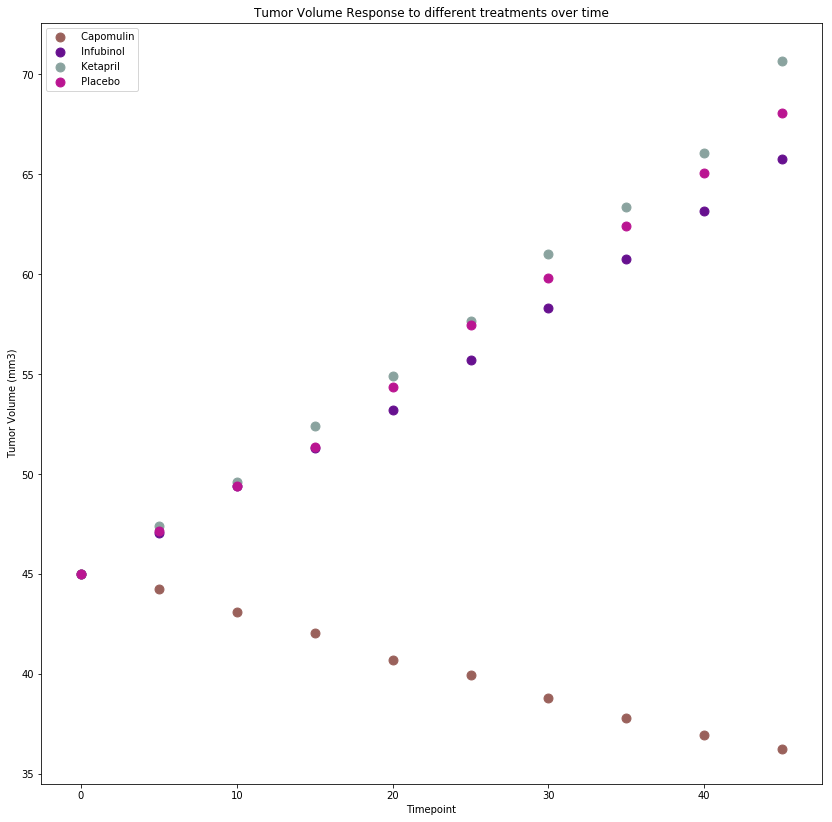

In [13]:
#Creating a scatter plot that shows how the tumor volume changes over time for each treatment
mean_tumor_volume = pd.DataFrame(data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())
mean_tumor_volume = mean_tumor_volume.reset_index()

fig, ax = plt.subplots()
for label, d in mean_tumor_volume.groupby('Drug'):
    color = list(np.random.uniform(size=3))
    d.plot.scatter('Timepoint', 'Tumor Volume (mm3)',
    label=f" {label}", title=("Tumor Volume Response to different treatments over time"), ax=ax, c=[color], 
    figsize=(14,14), s=80)

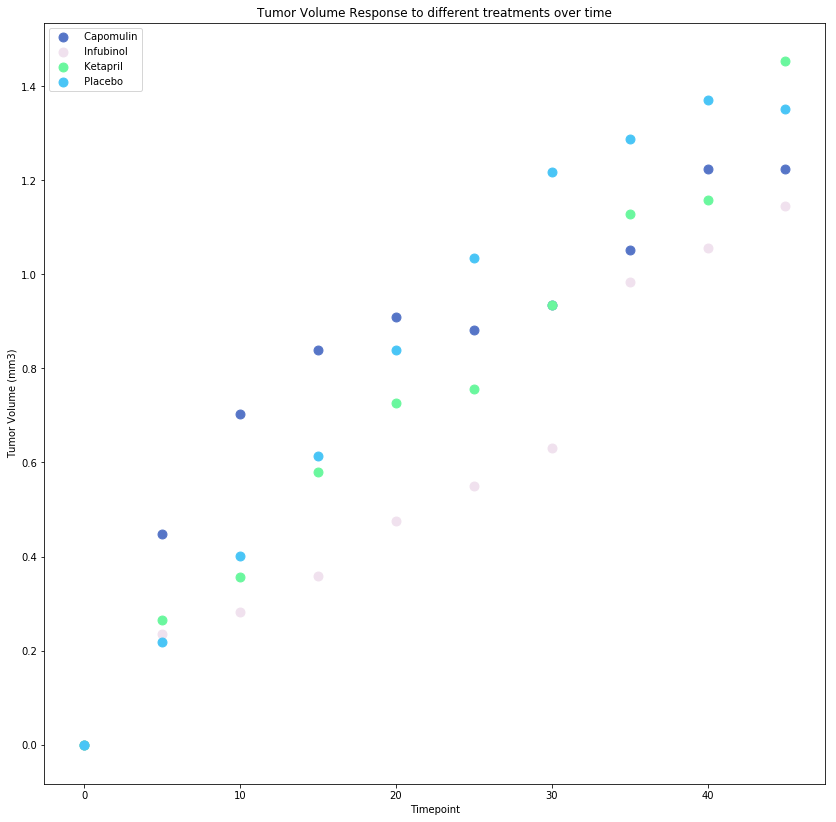

In [14]:
#Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment
mean_tumor_volume_sd = pd.DataFrame(data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem())
mean_tumor_volume_sd = mean_tumor_volume_sd.reset_index()

fig, ax = plt.subplots()
for label, d in mean_tumor_volume_sd.groupby('Drug'):
    color = list(np.random.uniform(size=3))
    d.plot.scatter('Timepoint', 'Tumor Volume (mm3)',
    label=f" {label}", title=("Tumor Volume Response to different treatments over time"), ax=ax, c=[color], 
    figsize=(14,14), s=80)

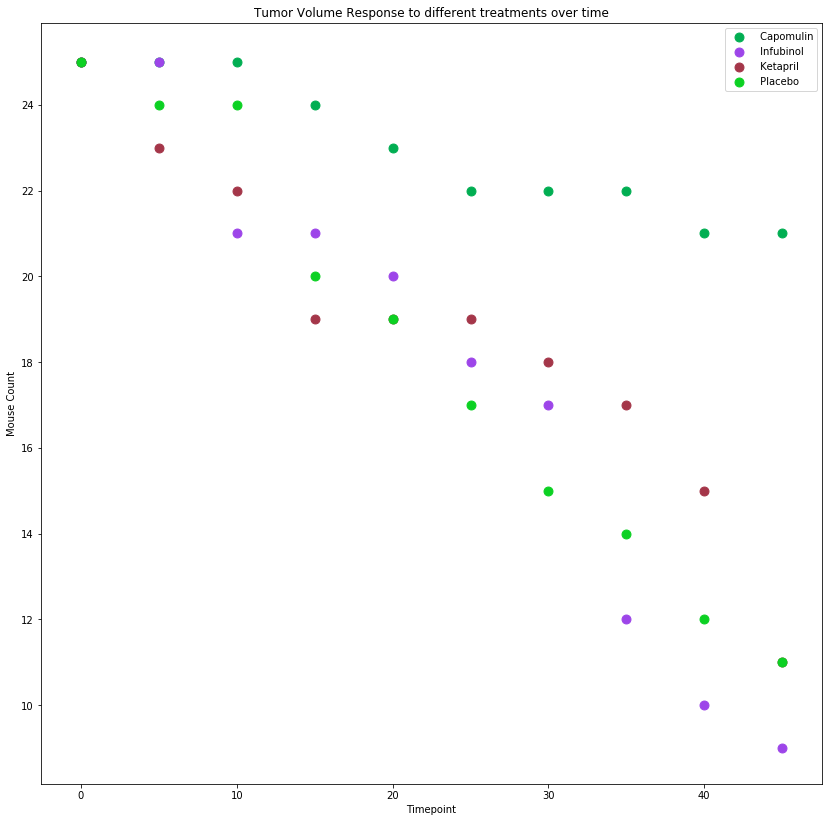

In [17]:
#Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
mice_count = pd.DataFrame(data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].count())
mice_count = mice_count.rename(columns={"Tumor Volume (mm3)":"Mouse Count"})
mice_count = mice_count.reset_index()

fig, ax = plt.subplots()
for label, d in mice_count.groupby('Drug'):
    color = list(np.random.uniform(size=3))
    d.plot.scatter('Timepoint', 'Mouse Count',
    label=f" {label}", title=("Tumor Volume Response to different treatments over time"), ax=ax, c=[color], 
    figsize=(14,14), s=80)

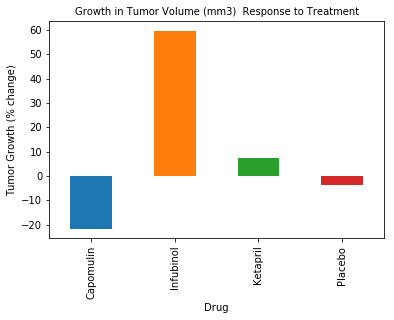

In [39]:
#Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
mean_tumor_volume['Change'] = 100 * np.log(mean_tumor_volume['Tumor Volume (mm3)'] / mean_tumor_volume['Tumor Volume (mm3)'].shift(1) )
mean_tumor_volume = mean_tumor_volume.fillna(0)

#Plot Bar
Drugs = ["Capomulin", "Infubinol", "Placebo", "Ketapril"]
plt.title("Growth in Tumor Volume (mm3)  Response to Treatment", fontsize = 10)
plt.xlabel("Treatment")
plt.ylabel("Tumor Growth (% change)")
volume_graph =  mean_tumor_volume.groupby(['Drug'])['Change'].sum().plot.bar()

#mean_tumor_volume.head(10)